# Т-3

## По трем значениям случайного вектора ($\xi, \eta, \omega$) : (1, 0, 1), (0, 1, 5), (1, 1, 2):

### a) Найти уравнение линейной регрессии $\omega$ = a $\xi$ + b $\eta$

In [80]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

In [ ]:
import numpy as np

def generate_data():
    """Генерация данных (ξ, η, ω)."""
    return np.array([
        [1, 0, 1],
        [0, 1, 5],
        [1, 1, 2]
    ])

def prepare_data(data):
    """Подготовка матрицы признаков X и вектора y."""
    X = data[:, :2]
    y = data[:, 2]
    return X, y

def calculate_coefficients(X, y):
    """Расчет коэффициентов регрессии β = (X^T X)^(-1) X^T y."""
    X_transposed = X.T
    XTX = X_transposed @ X  
    XTX_inv = np.linalg.inv(XTX)  
    beta = XTX_inv @ (X_transposed @ y)
    return beta

def format_equation(beta):
    """Форматирование уравнения регрессии."""
    a, b = beta
    return f"ω = {a:.2f}ξ + {b:.2f}η"

def pretty_print(X, y, beta, equation):
    """Красивый вывод результатов."""
    print("Матрица признаков X:")
    print(X)
    print("\nВектор y:")
    print(y)
    print("\nКоэффициенты регрессии:")
    print(f"a = {beta[0]:.4f}, b = {beta[1]:.4f}")
    print(f"\nУравнение линейной регрессии:\n{equation}")



data = generate_data()    

X, y = prepare_data(data)    

beta = calculate_coefficients(X, y)    

equation = format_equation(beta)

pretty_print(X, y, beta, equation)




Матрица признаков X:
[[1 0]
 [0 1]
 [1 1]]

Вектор y:
[1 5 2]

Коэффициенты регрессии:
a = -0.3333, b = 3.6667

Уравнение линейной регрессии:
ω = -0.33ξ + 3.67η



            Результаты Ridge-регрессии            
Оптимальный параметр регуляризации: λ = 1.4697
Коэффициент для ξ: 0.3088
Коэффициент для η: 1.9285

Финальное уравнение: ω = 0.3088·ξ + 1.9285·η



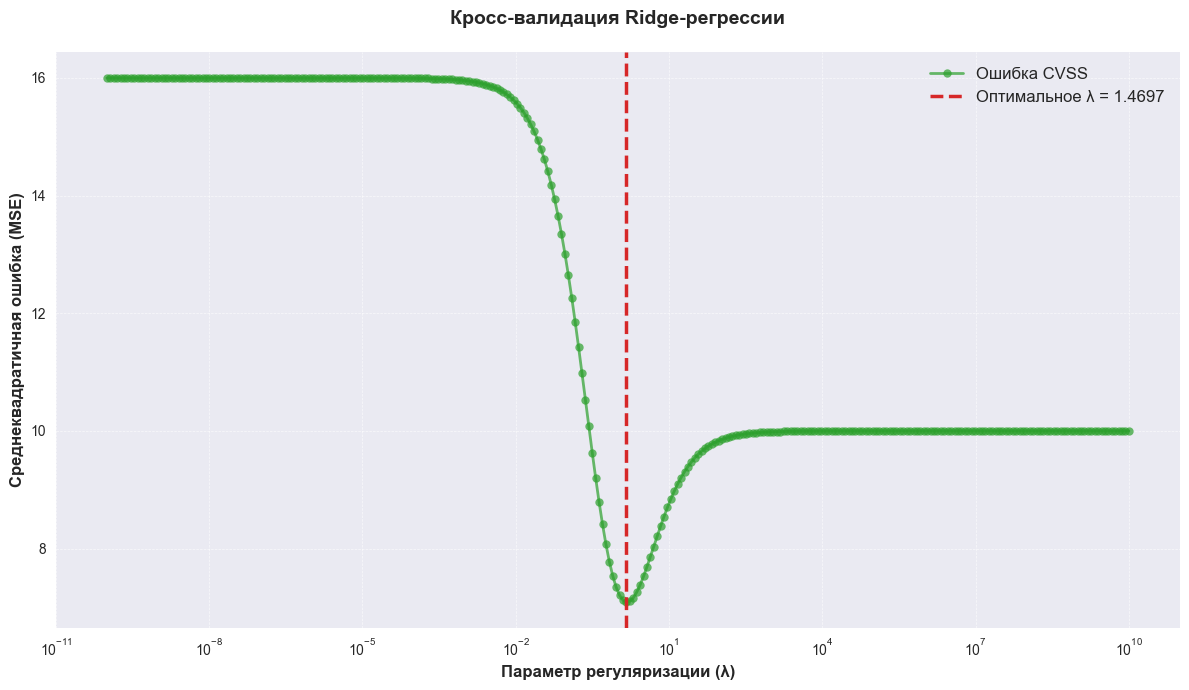

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Стиль графиков
plt.style.use('seaborn-v0_8')

def load_data():
    """Загрузка и подготовка данных"""
    raw_data = np.array([
        [1, 0, 1],
        [0, 1, 5],
        [1, 1, 2]
    ])
    X = raw_data[:, :2]  # Признаки ξ и η
    y = raw_data[:, 2]   # Целевая переменная ω
    return X, y

def generate_lambdas():
    """Генерация диапазона значений λ"""
    return np.logspace(-10, 10, 300)

def perform_cross_validation(X, y, lambdas):
    """Выполнение кросс-валидации для разных λ"""
    cv_scores = []
    for lambda_val in lambdas:
        model = Ridge(alpha=lambda_val, fit_intercept=False)
        scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
        cv_scores.append(np.abs(np.mean(scores)))
    return cv_scores

def find_optimal_lambda(lambdas, cv_scores):
    """Нахождение оптимального значения λ"""
    return lambdas[np.argmin(cv_scores)]

def train_final_model(X, y, optimal_lambda):
    """Обучение финальной модели с оптимальным λ"""
    model = Ridge(alpha=optimal_lambda, fit_intercept=False)
    model.fit(X, y)
    return model

def plot_results(lambdas, cv_scores, optimal_lambda):
    """Визуализация результатов с улучшенным оформлением"""
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
    
    # Основной график
    ax.semilogx(lambdas, cv_scores, 
               marker='o', markersize=6,
               linestyle='-', linewidth=2,
               color='#2ca02c', alpha=0.7,
               label='Ошибка CVSS')
    
    # Оптимальное значение λ
    ax.axvline(optimal_lambda, 
              color='#d62728', linestyle='--', linewidth=2.5,
              label=f'Оптимальное λ = {optimal_lambda:.4f}')
    
    # Настройки оформления
    ax.set_xlabel('Параметр регуляризации (λ)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Среднеквадратичная ошибка (MSE)', fontsize=12, fontweight='bold')
    ax.set_title('Кросс-валидация Ridge-регрессии', fontsize=14, fontweight='bold', pad=20)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(fontsize=12, framealpha=1, shadow=True)
    
    plt.tight_layout()
    plt.show()

def print_results(model, optimal_lambda):
    """Красивый вывод результатов."""
    coef = model.coef_
    print("\n" + "="*50)
    print(f"{'Результаты Ridge-регрессии':^50}")
    print("="*50)
    print(f"Оптимальный параметр регуляризации: λ = {optimal_lambda:.4f}")
    print(f"Коэффициент для ξ: {coef[0]:.4f}")
    print(f"Коэффициент для η: {coef[1]:.4f}")
    print(f"\nФинальное уравнение: ω = {coef[0]:.4f}·ξ + {coef[1]:.4f}·η")
    print("="*50 + "\n")

# Основной поток выполнения
X, y = load_data()
lambdas = generate_lambdas()
cv_scores = perform_cross_validation(X, y, lambdas)
optimal_lambda = find_optimal_lambda(lambdas, cv_scores)
final_model = train_final_model(X, y, optimal_lambda)

# Вывод результатов
print_results(final_model, optimal_lambda)
plot_results(lambdas, cv_scores, optimal_lambda)


            Результаты Lasso-регрессии            
Оптимальный параметр регуляризации: λ = 1.5199
Коэффициент для ξ: 0.0000
Коэффициент для η: 1.2201

Финальное уравнение: ω = 0.0000·ξ + 1.2201·η



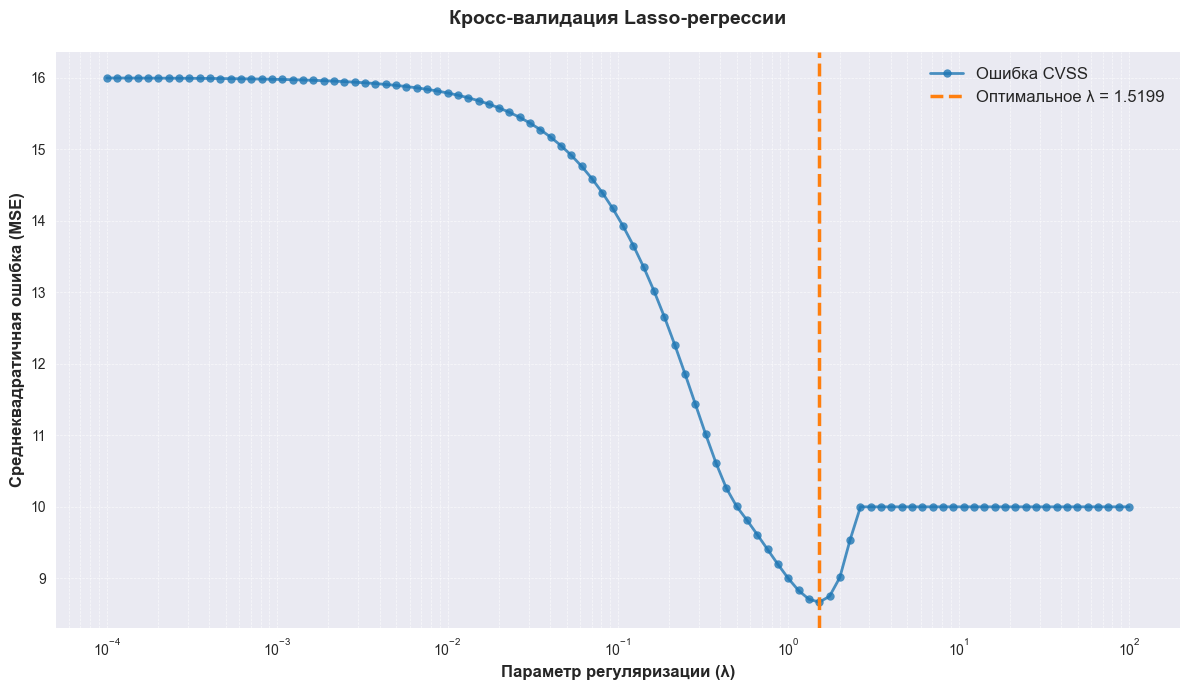

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

# Стиль графиков
plt.style.use('seaborn-v0_8')

def generate_data():
    """Генерация данных (ξ, η, ω)."""
    return np.array([
        [1, 0, 1],
        [0, 1, 5],
        [1, 1, 2]
    ])

def prepare_data(data):
    """Подготовка матрицы признаков X и вектора y."""
    X = data[:, :2]
    y = data[:, 2]
    return X, y

def compute_cv_scores(X, y, lambdas):
    """Вычисление ошибок кросс-валидации для различных значений λ."""
    cv_scores = []
    for lambda_val in lambdas:
        model = Lasso(alpha=lambda_val, fit_intercept=False, max_iter=10000)
        scores = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error')
        cv_scores.append(-np.mean(scores))
    return cv_scores

def find_optimal_lambda(lambdas, cv_scores):
    """Поиск оптимального значения λ."""
    return lambdas[np.argmin(cv_scores)]

def train_lasso_model(X, y, optimal_lambda):
    """Обучение модели Lasso с оптимальным λ."""
    model = Lasso(alpha=optimal_lambda, fit_intercept=False, max_iter=10000)
    model.fit(X, y)
    return model

def plot_cv_scores(lambdas, cv_scores, optimal_lambda):
    """Построение красивого графика ошибок кросс-валидации."""
    fig, ax = plt.subplots(figsize=(12, 7), facecolor='white')
    
    # Основной график
    ax.semilogx(lambdas, cv_scores, 
               marker='o', markersize=6,
               linestyle='-', linewidth=2,
               color='#1f77b4', alpha=0.8,
               label='Ошибка CVSS')
    
    # Оптимальное значение λ
    ax.axvline(optimal_lambda, 
              color='#ff7f0e', linestyle='--', linewidth=2.5,
              label=f'Оптимальное λ = {optimal_lambda:.4f}')
    
    # Настройки оформления
    ax.set_xlabel('Параметр регуляризации (λ)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Среднеквадратичная ошибка (MSE)', fontsize=12, fontweight='bold')
    ax.set_title('Кросс-валидация Lasso-регрессии', fontsize=14, fontweight='bold', pad=20)
    
    ax.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
    ax.legend(fontsize=12, framealpha=1, shadow=True)
    
    plt.tight_layout()
    plt.show()

def print_results(model, optimal_lambda):
    """Красивый вывод результатов."""
    coef = model.coef_
    print("\n" + "="*50)
    print(f"{'Результаты Lasso-регрессии':^50}")
    print("="*50)
    print(f"Оптимальный параметр регуляризации: λ = {optimal_lambda:.4f}")
    print(f"Коэффициент для ξ: {coef[0]:.4f}")
    print(f"Коэффициент для η: {coef[1]:.4f}")
    print(f"\nФинальное уравнение: ω = {coef[0]:.4f}·ξ + {coef[1]:.4f}·η")
    print("="*50 + "\n")


data = generate_data()
X, y = prepare_data(data)
lambdas = np.logspace(-4, 2, 100)
cv_scores = compute_cv_scores(X, y, lambdas)
optimal_lambda = find_optimal_lambda(lambdas, cv_scores)
model = train_lasso_model(X, y, optimal_lambda)

print_results(model, optimal_lambda)
plot_cv_scores(lambdas, cv_scores, optimal_lambda)